<a href="https://colab.research.google.com/github/pbelevich/virtual-try-on/blob/main/MultiGarmentNetwork_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A demo of https://github.com/bharat-b7/MultiGarmentNetwork running on Colab

In [1]:
!test -d .git || rm -rf {,.[!.],..?}*

In [2]:
!test -d .git || git clone --quiet https://github.com/bharat-b7/MultiGarmentNetwork.git .

Download digital wardrobe: [Part-1](https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset.zip) and [Part-2](https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset_02.zip).
This dataset contains scans, SMPL registration, texture_maps, segmentation_maps and multi-mesh registered garments.

In [3]:
!test -f Multi-Garmentdataset.zip || wget -q -nc https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset.zip

In [4]:
!test -f Multi-Garmentdataset_02.zip || wget -q -nc https://datasets.d2.mpi-inf.mpg.de/MultiGarmentNetwork/Multi-Garmentdataset_02.zip

In [5]:
!test -d Multi-Garmentdataset || unzip -qn Multi-Garmentdataset.zip

In [6]:
!test -d Multi-Garmentdataset_02 || unzip -qn Multi-Garmentdataset_02.zip

Download the neutral SMPL model from http://smplify.is.tue.mpg.de/ and place it in the assets folder.

In [7]:
!mkdir -p assets
!test -f mpips-smplify_public_v2.zip || gdown --id 1BwNtKvArmUdy4Cpkx1seIlsHinopdaws
!test -f assets/neutral_smpl.pkl || unzip -n -p mpips-smplify_public_v2.zip smplify_public/code/models/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl > assets/neutral_smpl.pkl

Downloading...
From: https://drive.google.com/uc?id=1BwNtKvArmUdy4Cpkx1seIlsHinopdaws
To: /content/mpips-smplify_public_v2.zip
53.0MB [00:01, 32.7MB/s]


Download and install DIRT: https://github.com/pmh47/dirt.

In [8]:
!test -d dirt_dir || git clone --quiet https://github.com/pmh47/dirt.git dirt_dir
!sed -i 's|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_30 --expt-relaxed-constexpr -DNDEBUG")|set(CMAKE_CUDA_FLAGS "${CMAKE_CUDA_FLAGS} -arch=sm_60 --expt-relaxed-constexpr -DNDEBUG")|' dirt_dir/csrc/CMakeLists.txt
!cd dirt_dir && pip install -q .

     |████████████████████████████████| 454.3MB 36kB/s 


Download and install mesh packages for visualization: https://github.com/MPI-IS/mesh

In [9]:
!test -d mesh_dir || git clone --quiet https://github.com/MPI-IS/mesh.git mesh_dir

In [10]:
!apt-get install -qq libboost-dev xvfb libosmesa6-dev

Selecting previously unselected package xvfb.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Selecting previously unselected package libosmesa6:amd64.
Preparing to unpack .../libosmesa6_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libosmesa6:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Selecting previously unselected package libosmesa6-dev:amd64.
Preparing to unpack .../libosmesa6-dev_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libosmesa6-dev:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up libosmesa6:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libosmesa6-dev:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [11]:
!cd mesh_dir && make all

----- [ mesh_package ] Installing with the interpreter /usr/local/bin/python (version 3.7.10)
Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (from -r requirements.txt (line 1)) (57.0.0)
     |████████████████████████████████| 15.3MB 449kB/s 
     |████████████████████████████████| 10.3MB 30.9MB/s 
     |████████████████████████████████| 27.4MB 1.3MB/s 
Requirement already up-to-date: pyopengl in /usr/local/lib/python3.7/dist-packages (from -r requirements.txt (line 5)) (3.1.5)
     |████████████████████████████████| 3.0MB 37.4MB/s 
     |████████████████████████████████| 1.1MB 26.9MB/s 
     |████████████████████████████████| 645kB 38.8MB/s 
     |████████████████████████████████| 51.0MB 141kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: tensorflow-gpu 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirem

In [12]:
!pip install -q chumpy opendr

     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 583kB 10.9MB/s 


Patch Python 2 to Python 3 and fix hardcoded paths

In [13]:
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pkl|import _pickle as pkl|' {} \;
!find ./ -type f -name "*.py" -exec sed -i 's|import cPickle as pickle|import _pickle as pickle|' {} \;
!find ./ -type f -name "*.py" -exec sed -i -r s/pkl\.load[\(]open[\(]\(.+\)[\)][\)]/pkl.load\(open\(\\1,\ \'rb\'\)\ ,\ encoding=\'latin1\'\)/g  {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_release/||" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/bharat/work/MGN_final_release/||" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from posemapper|from .posemapper|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from serialization|from .serialization|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|from verts|from .verts|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|^import lbs$|from . import lbs|" {} \;
!find ./ -type f -name "*.py" -exec sed -i "s|/BS/RVH/work/data/smpl_models/neutral/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl|assets/neutral_smpl.pkl|" {} \;

In [14]:
from IPython.display import Image

Load scan and visualize texture and segmentation.

In [15]:
!sed -i "s|scan2.show()|scan2.show().save_snapshot('scan.png', blocking=True)|" visualize_scan.py

In [16]:
!xvfb-run -a python visualize_scan.py

Saving snapshot to scan.png, please wait...
Done


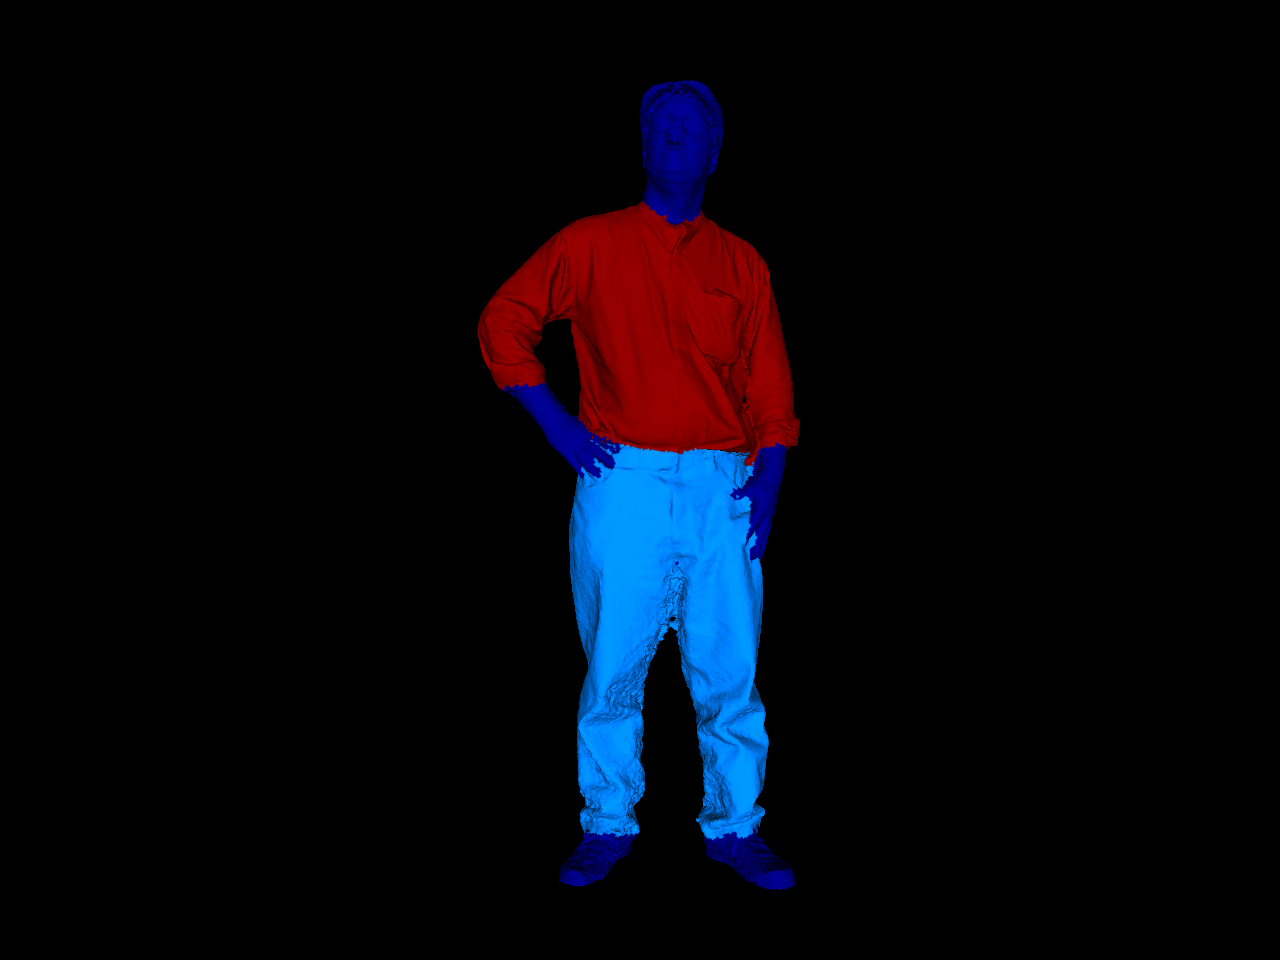

In [17]:
Image('scan.png')

Visualize random garment and coresponding SMPL model.

In [18]:
!sed -i "s|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\])|mvs\[0\]\[1\].set_static_meshes(\[garment_org_body\]); mvs\[0\]\[1\].save_snapshot('garment_org_body.png', blocking=True)|" visualize_garments.py
!sed -i "s|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\])|mvs\[0\]\[2\].set_static_meshes(\[garment_org_body, garment_posed\]); mvs\[0\]\[2\].save_snapshot('garment_org_body_garment_posed.png', blocking=True)|" visualize_garments.py
!sed -i "s|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\])|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\]); mvs\[0\]\[0\].save_snapshot('garment_unposed.png', blocking=True)|" visualize_garments.py

In [19]:
!xvfb-run -a python visualize_garments.py

Saving snapshot to garment_org_body.png, please wait...
Saving snapshot to garment_org_body_garment_posed.png, please wait...
Saving snapshot to garment_unposed.png, please wait...
Done


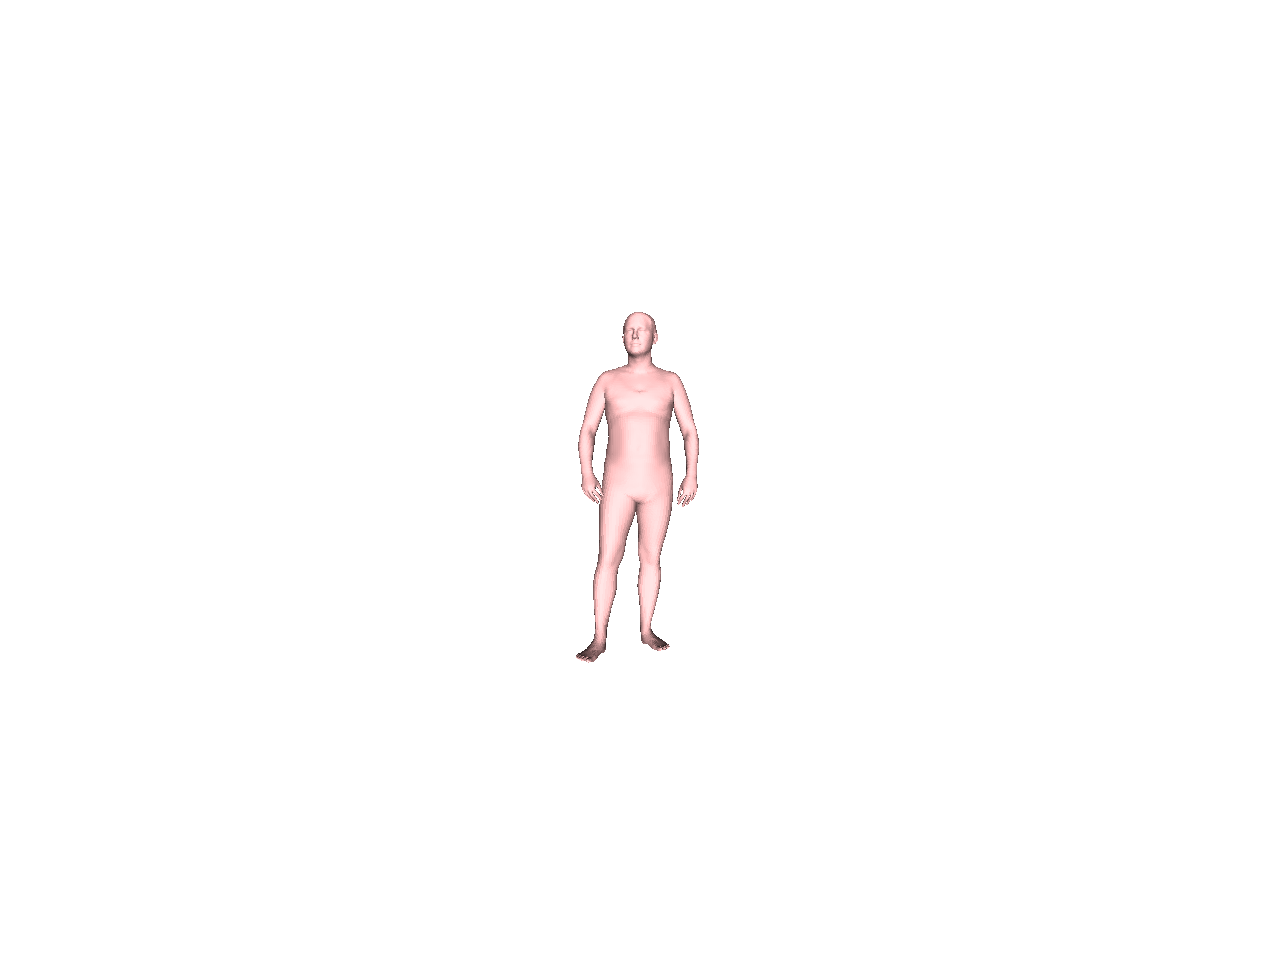

In [20]:
Image('garment_org_body.png')

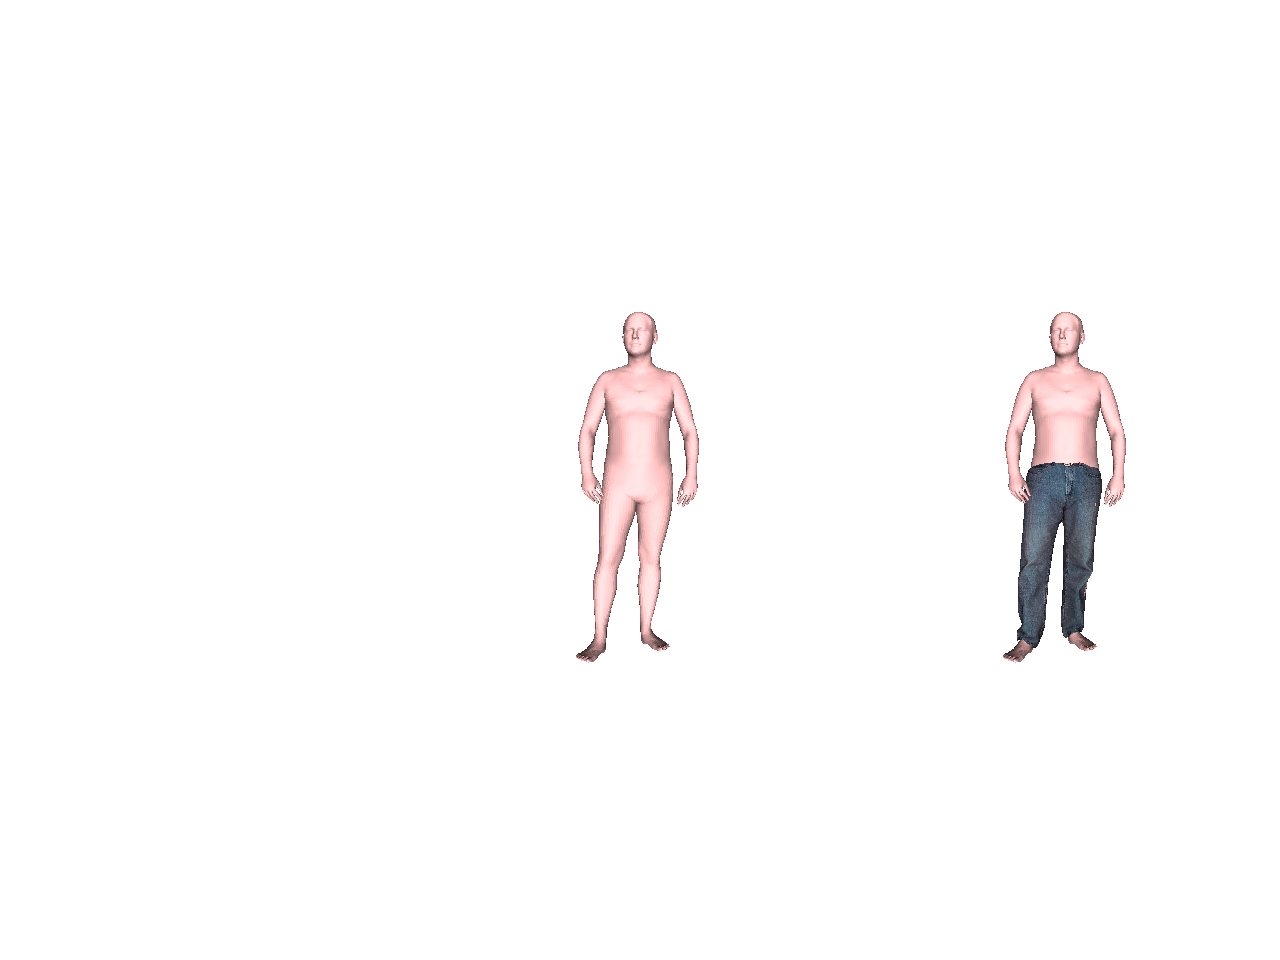

In [21]:
Image('garment_org_body_garment_posed.png')

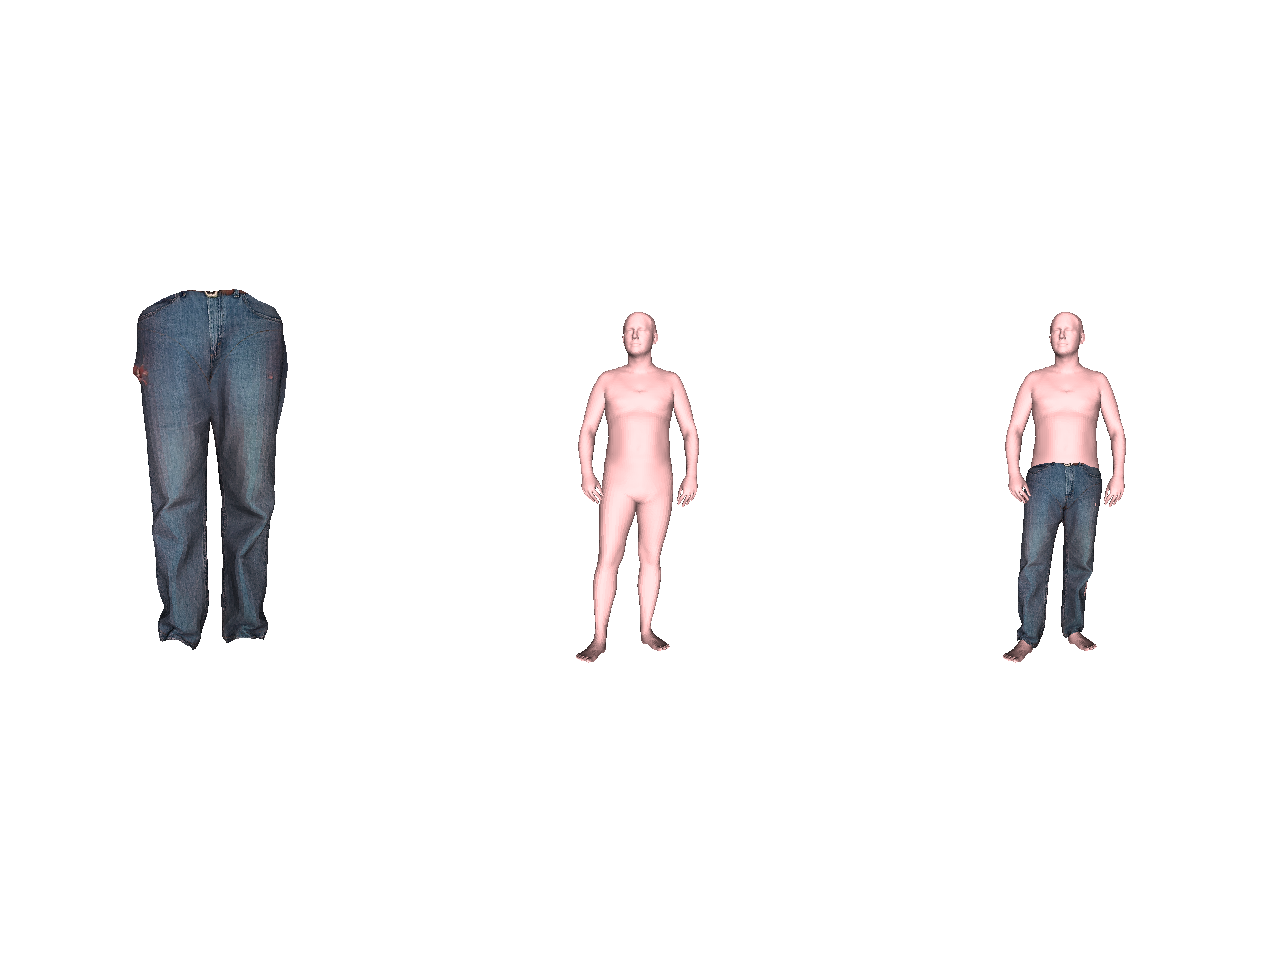

In [22]:
Image('garment_unposed.png')

Load random garment and dress desired SMPL body with it.

In [23]:
!sed -i "s|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\])|mvs\[0\]\[0\].set_static_meshes(\[garment_unposed\]); mvs\[0\]\[0\].save_snapshot('dress_unposed.png', blocking=True)|" dress_SMPL.py
!sed -i "s|mvs\[0\]\[1\].set_static_meshes(\[new_garment, tgt_body\])|mvs\[0\]\[1\].set_static_meshes(\[new_garment, tgt_body\]); mvs\[0\]\[1\].save_snapshot('dress_posed.png', blocking=True)|" dress_SMPL.py

Saving snapshot to dress_unposed.png, please wait...
Saving snapshot to dress_posed.png, please wait...
Done


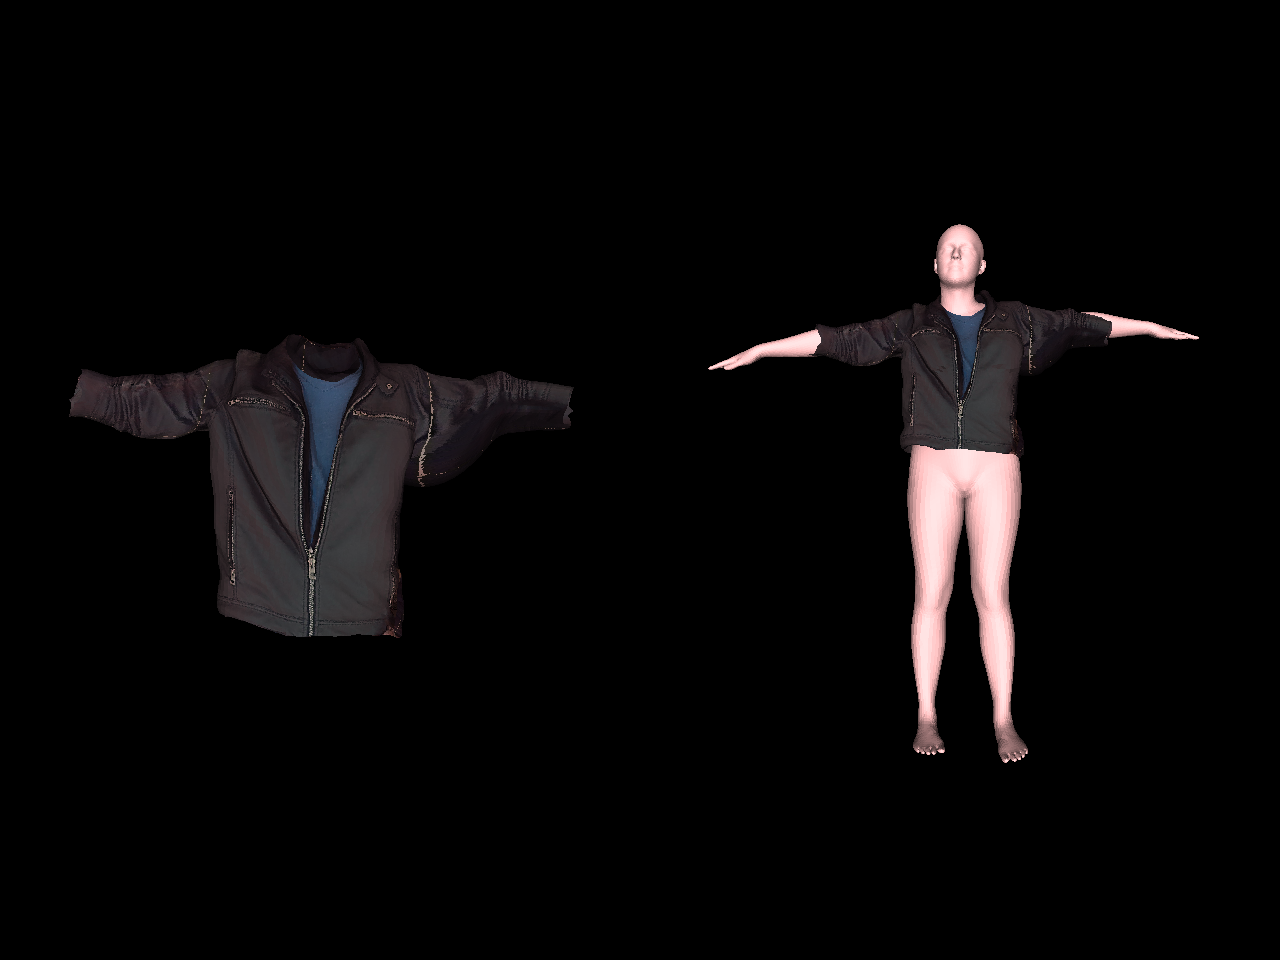

In [24]:
!xvfb-run -a python dress_SMPL.py
Image('dress_posed.png')

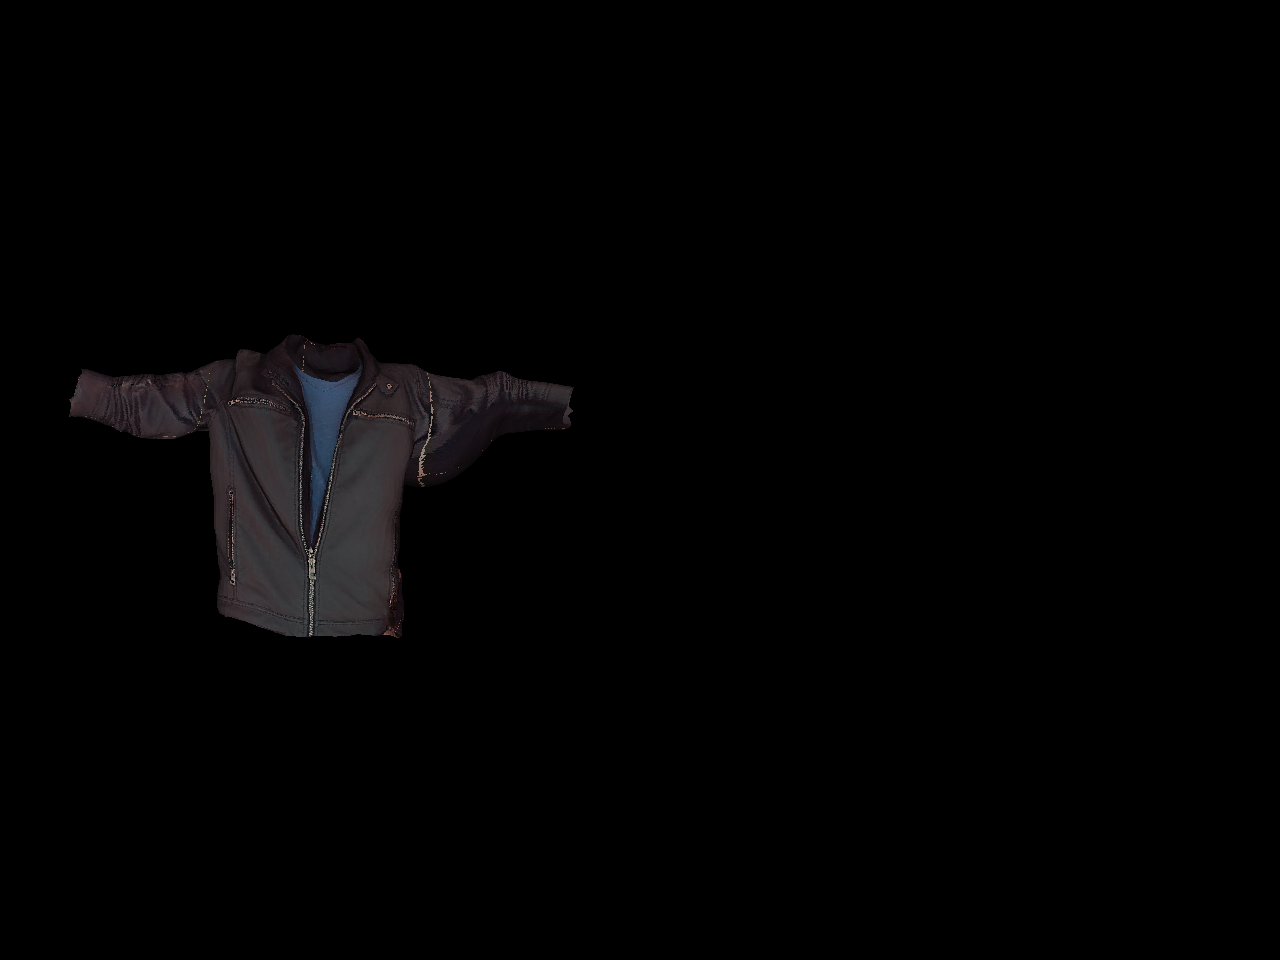

In [25]:
Image('dress_unposed.png')

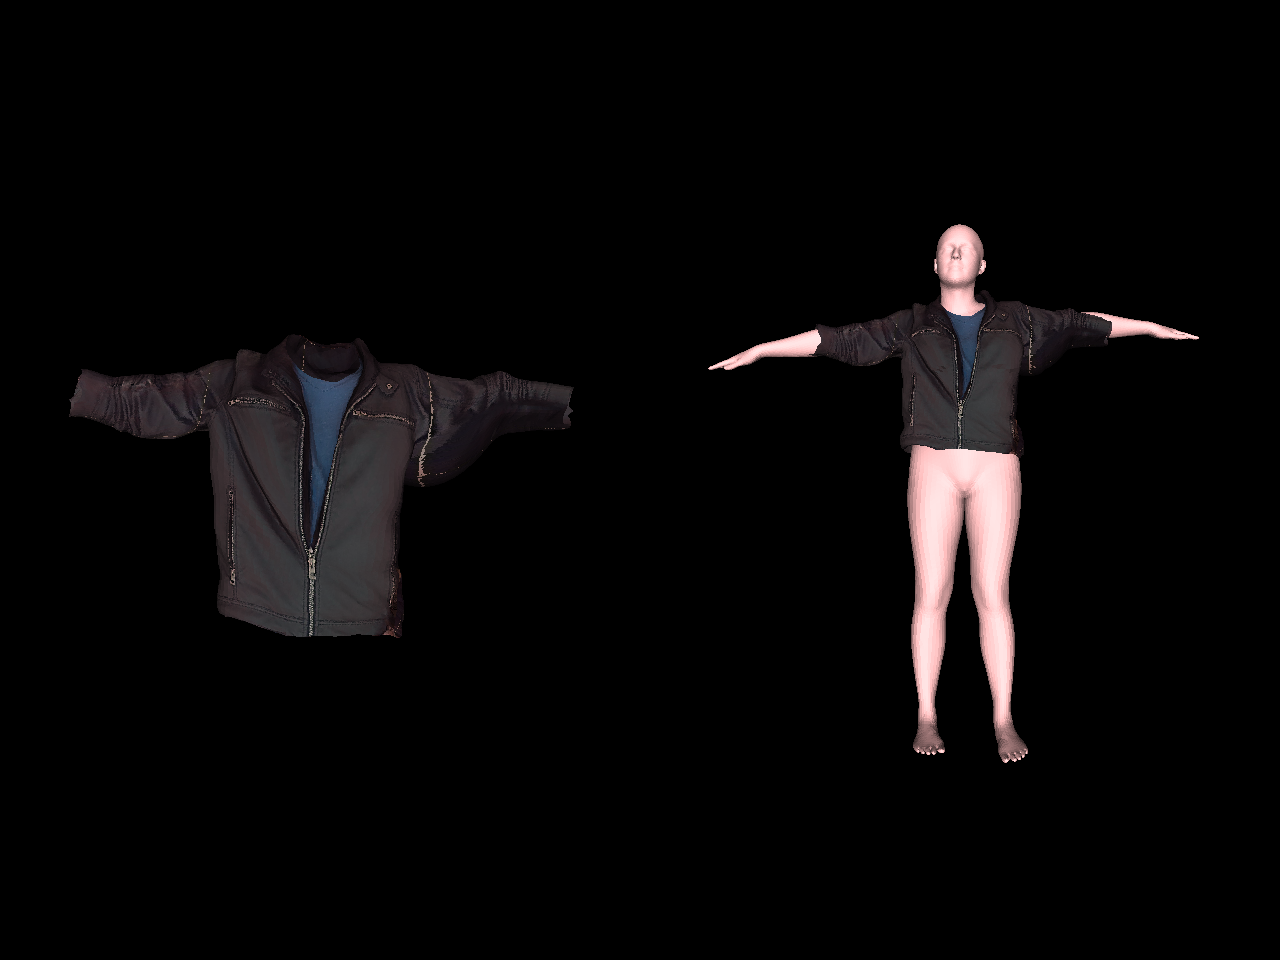

In [26]:
Image('dress_posed.png')